In [25]:
import numpy as np
import pandas as pd
import logomaker as lm
import matplotlib.pyplot as plt

#Load data
folder = ''

# Constructing the input 
data_off = pd.read_csv(folder + 'off_sequences_v2.txt', header=0)
data_on = pd.read_csv(folder + 'on_sequences_v2.txt', header=0)

In [26]:
def draw_logo(sequences, start, stop, highlight, name=None):
    """
    Generates and visualizes a sequence logo using the provided sequences.

    Parameters:
    - sequences (list): A list of sequences.
    - start (int): The starting position for creating the logo.
    - stop (int): The stopping position for creating the logo.
    - highlight (list): A list of positions to highlight in the logo.
    - name (str, optional): The name of the file to save the generated logo. If not provided, the logo is displayed without saving.

    Returns:
    - logo: The logo of the sequence enrichment.
    """
    matrix = lm.alignment_to_matrix(sequences = sequences)
    
    matrix = matrix.iloc[start:stop, :]
    matrix.reset_index(inplace=True, drop=True)
    matrix = lm.transform_matrix(matrix, from_type='counts', to_type='probability')
    sequences = sequences[start:stop]
    
    logo = lm.Logo(matrix, color_scheme = 'chemistry', fade_probabilities=True, stack_order='small_on_top')
    
    logo.ax.set_xticks(range(stop-start))
    logo.ax.set_xticklabels('%d'%x for x in range(start,stop))
    logo.ax.xaxis.set_ticks_position('none')
    
    for i in highlight:
        logo.highlight_position(i,color='gold')
    
    
    if name is not None:
        plt.savefig(name)
    plt.show()
    logo.ax.xaxis.set_tick_params(pad=-1)
    return sequences

def opt_draw_logo(sequences, start, stop, highlight, name=None,num=10):
    """
    Attempts to draw a sequence logo using the provided sequences. If the necessary module is not found, it prints an error message.

    Parameters:
    - sequences (list): A list of sequences.
    - start (int): The starting position for creating the logo.
    - stop (int): The stopping position for creating the logo.
    - highlight (list): A list of positions to highlight in the logo.
    - name (str, optional): The name of the file to save the generated logo. If not provided, the logo is displayed without saving.
    - num (int, optional): The number of attempts to draw the logo.
     """
    try:
        draw_logo(sequences, start, stop, highlight,name)
    except ModuleNotFoundError as e:
        print(e)

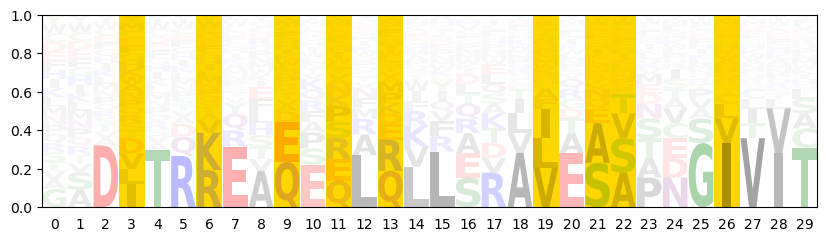

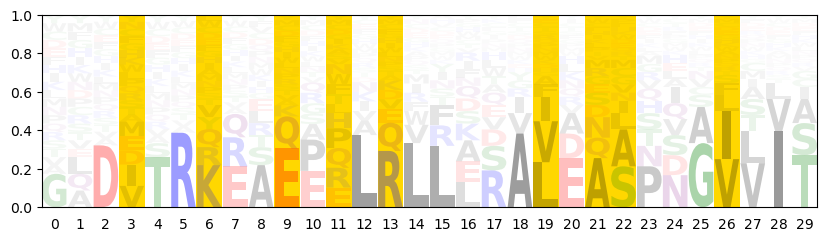

In [27]:
on_sequences = data_on['Sequences'].to_numpy()
off_sequences = data_off['Sequences'].to_numpy()


opt_draw_logo(on_sequences, 0, 30, [3,6,9,11,13,19,21,22,26])
opt_draw_logo(off_sequences, 0, 30, [3,6,9,11,13,19,21,22,26])

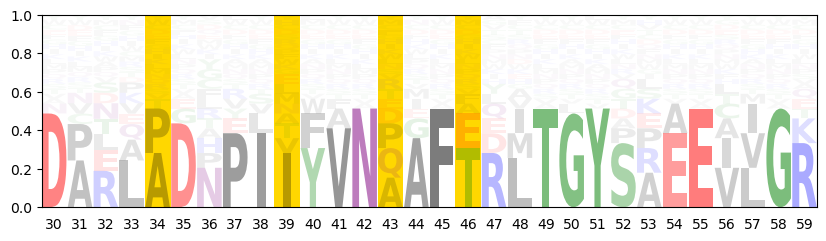

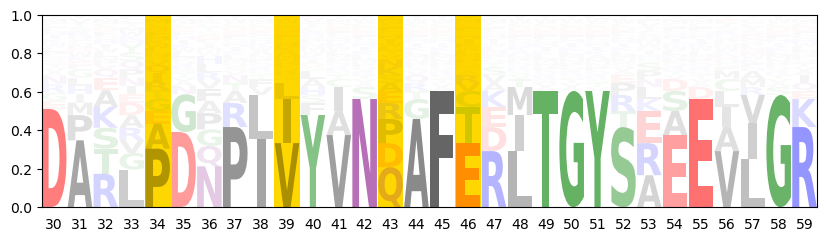

In [28]:
opt_draw_logo(on_sequences, 30, 60, [4,9,13,16])
opt_draw_logo(off_sequences, 30, 60,[4,9,13,16])

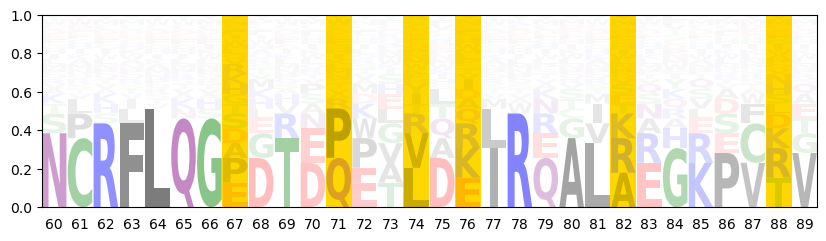

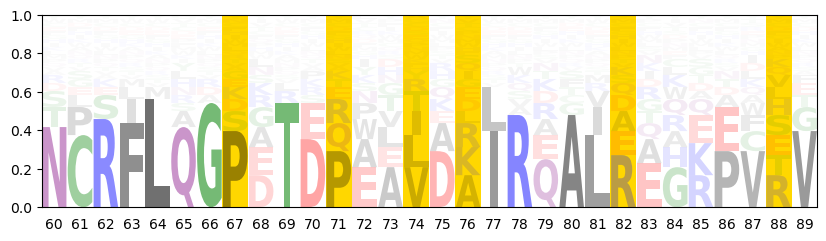

In [29]:
opt_draw_logo(on_sequences, 60, 90, [7,11,14,16,22,28])
opt_draw_logo(off_sequences, 60, 90,[7,11,14,16,22,28])

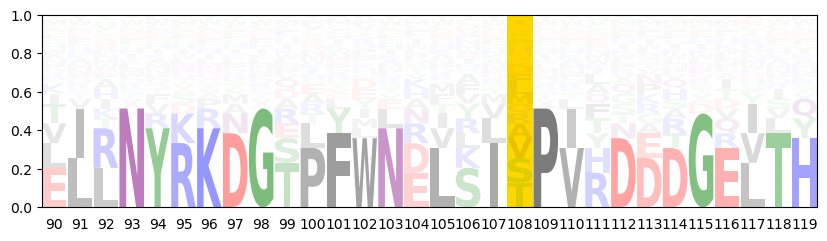

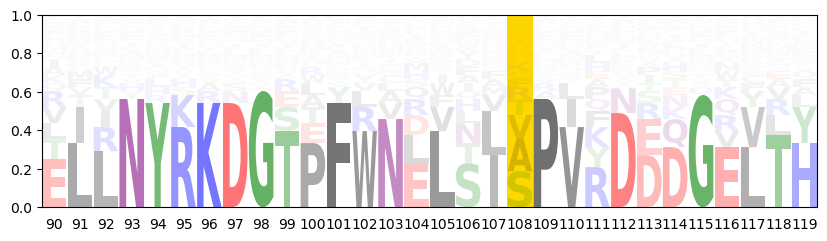

In [30]:
opt_draw_logo(on_sequences, 90, 120, [18])
opt_draw_logo(off_sequences, 90, 120, [18])

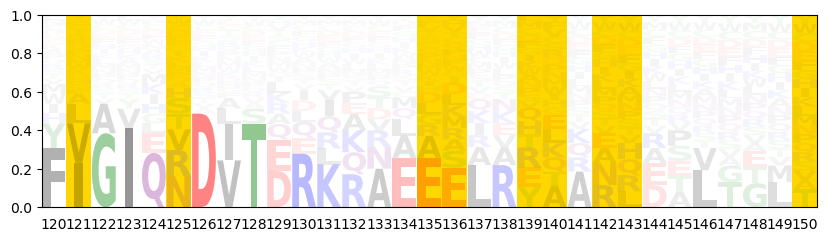

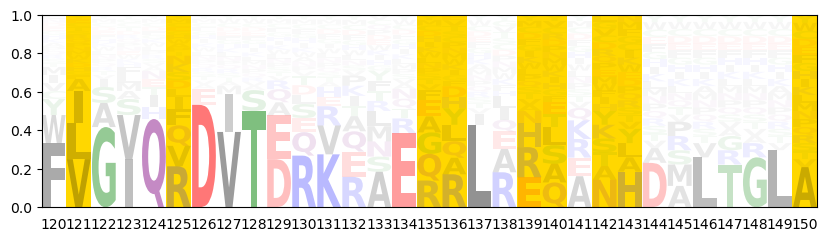

In [31]:
opt_draw_logo(on_sequences, 120, 151, [1,5,15,16,19,20,22,23,30])
opt_draw_logo(off_sequences, 120, 151, [1,5,15,16,19,20,22,23,30])